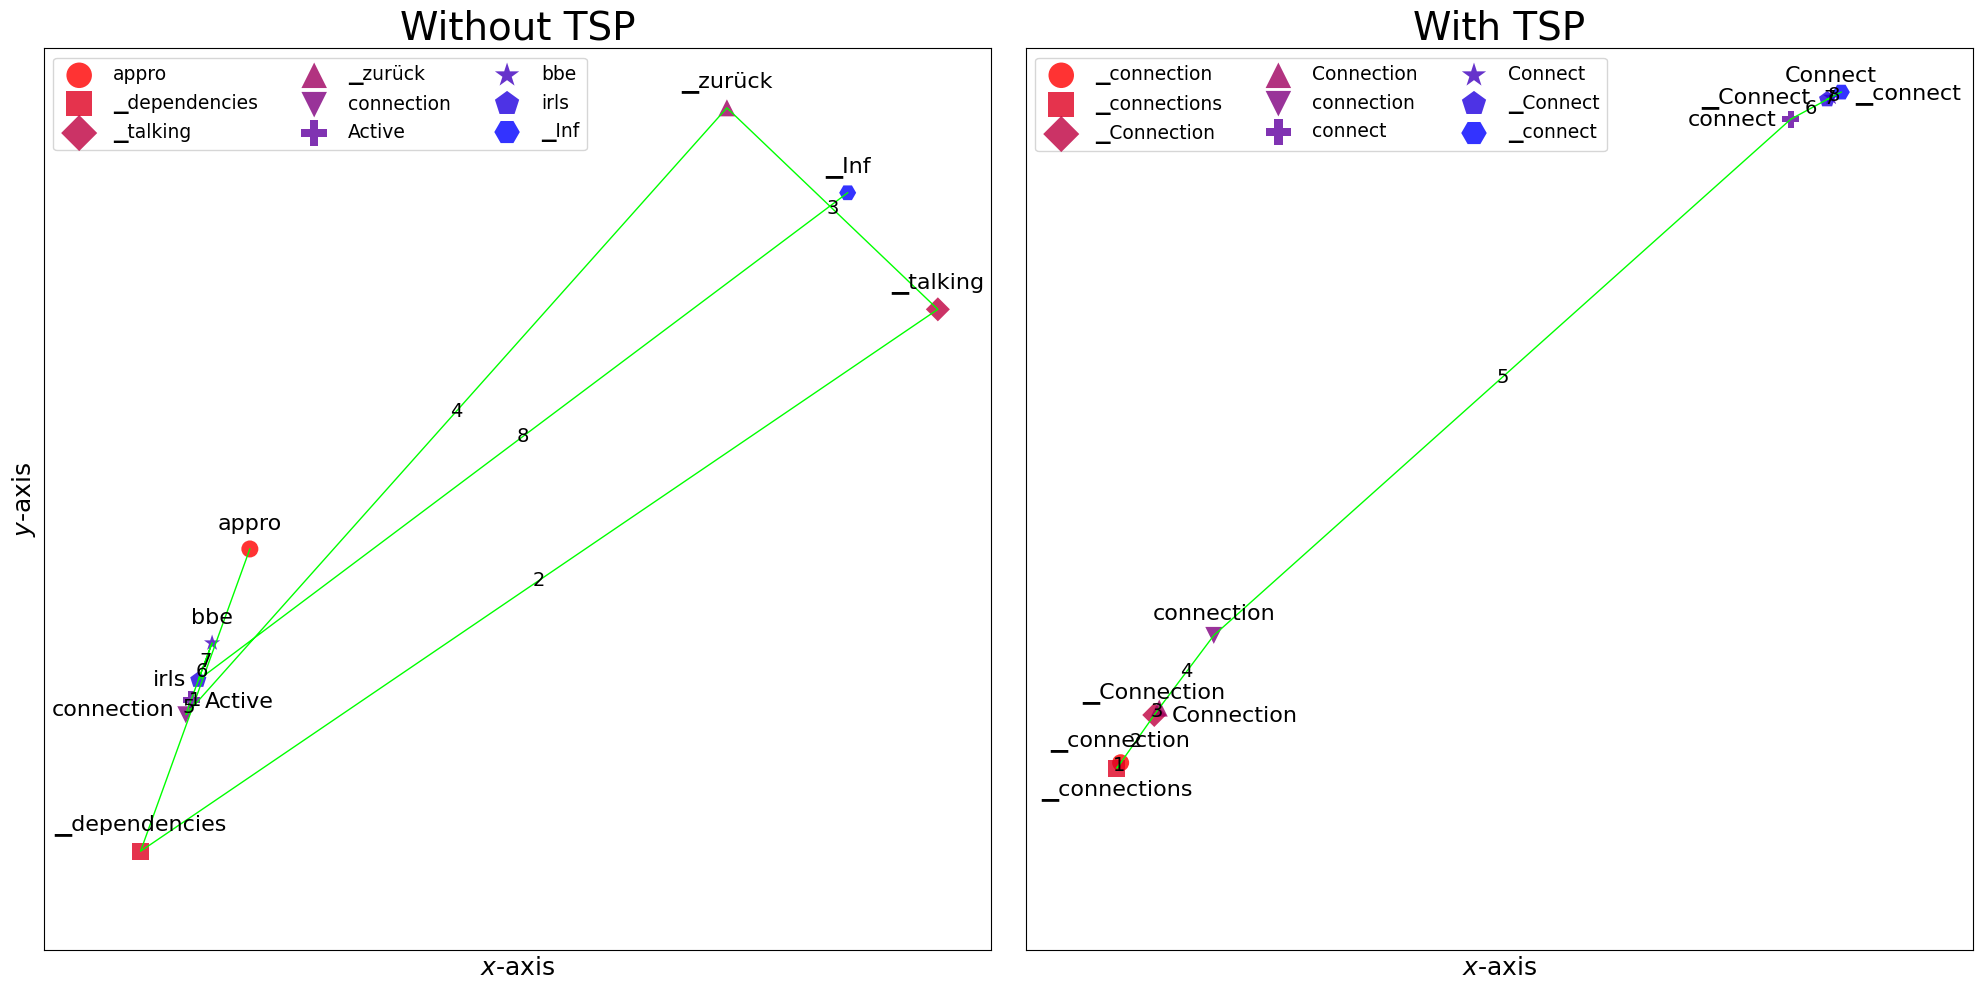

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Before / original indices
tokens_left = [
    "appro", "▁dependencies", "▁talking", "▁zurück",
    "connection", "Active", "bbe", "irls", "▁Inf"
]
xy_left = np.array([
    [-0.418274, +0.908321],
    [-0.531026, +0.847355],
    [+0.291254, +0.956646],
    [+0.073712, +0.997280],
    [-0.484337, +0.874882],
    [-0.478869, +0.877887],
    [-0.457214, +0.889357],
    [-0.471445, +0.881895],
    [+0.198258, +0.980150],
], dtype=float)

# After / TSP order mapped back to old ids
tokens_right = [
    "▁connection", "▁connections", "▁Connection", "Connection",
    "connection", "connect", "Connect", "▁Connect", "▁connect"
]
xy_right = np.array([
    [-0.628087, +0.778143],
    [-0.629909, +0.776669],
    [-0.611514, +0.791233],
    [-0.609060, +0.793124],
    [-0.582190, +0.813052],
    [-0.297790, +0.954632],
    [-0.277979, +0.960587],
    [-0.279947, +0.960015],
    [-0.272939, +0.962031],
], dtype=float)

markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'p', 'H']
def color_ramp(n):
    if n <= 1:
        return [(1.0, 0.0, 0.0)]
    return [(1 - i/(n-1), 0.0, i/(n-1)) for i in range(n)]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)

n_left = xy_left.shape[0]
colors_left = color_ramp(n_left)

for i in range(n_left):
    ax[0].scatter(
        xy_left[i:i+1, 0], xy_left[i:i+1, 1],
        color=colors_left[i], s=150, marker=markers[i % len(markers)],
        edgecolors='none', linewidths=0.8, alpha=0.8, label=tokens_left[i]
    )

ax[0].plot(xy_left[:, 0], xy_left[:, 1], color=(0, 1, 0), linewidth=1)
for i in range(n_left - 1):
    mx = (xy_left[i, 0] + xy_left[i+1, 0]) / 2
    my = (xy_left[i, 1] + xy_left[i+1, 1]) / 2
    ax[0].text(mx, my, str(i+1), color='black', fontsize=14, ha='center', va='center')

for i in range(n_left):
    dx = 0
    dy = 0.003
    if i == 4:
        dx = -0.075
        dy = -0.001
    elif i == 5:
        dx = 0.05
        dy = -0.0025
    elif i == 7:
        dx = -0.03
        dy = -0.002
    ax[0].text(xy_left[i, 0] + dx, xy_left[i, 1] + dy, tokens_left[i],
               fontsize=16, color='black', ha='center', va='bottom')

ax[0].set_xlabel(r"$x$-axis", fontsize=18)
ax[0].set_ylabel(r"$y$-axis", fontsize=18)
ax[0].set_title("Without TSP", fontsize=28)
ax[0].legend(markerscale=1.5, fontsize=13.5, ncol=3, loc='upper left')
ax[0].tick_params(axis='both', labelsize=16)
ax[0].set_xticks([]); ax[0].set_yticks([])

n_right = xy_right.shape[0]
colors_right = color_ramp(n_right)

for i in range(n_right):
    ax[1].scatter(
        xy_right[i:i+1, 0], xy_right[i:i+1, 1],
        color=colors_right[i], s=150, marker=markers[i % len(markers)],
        edgecolors='none', linewidths=0.8, alpha=0.8, label=tokens_right[i]
    )

ax[1].plot(xy_right[:, 0], xy_right[:, 1], color=(0, 1, 0), linewidth=1)
for i in range(n_right - 1):
    mx = (xy_right[i, 0] + xy_right[i+1, 0]) / 2
    my = (xy_right[i, 1] + xy_right[i+1, 1]) / 2
    ax[1].text(mx, my, str(i+1), color='black', fontsize=14, ha='center', va='center')

for i in range(n_right):
    dx = 0
    dy = 0.003
    if i == 1:
        dy = -0.009
    elif i == 3:
        dx = 0.037
        dy = -0.005
    elif i == 8:
        dx = 0.033
        dy = -0.0035
    elif i == 5:
        dx = -0.029
        dy = -0.003
    elif i == 7:
        dx = -0.035
        dy = -0.0025
    ax[1].text(xy_right[i, 0] + dx, xy_right[i, 1] + dy, tokens_right[i],
               fontsize=16, color='black', ha='center', va='bottom')

ax[1].set_xlabel(r"$x$-axis", fontsize=18)
ax[1].set_title("With TSP", fontsize=28)
ax[1].legend(markerscale=1.5, fontsize=13.5, ncol=3, loc='upper left')
ax[1].tick_params(axis='both', labelsize=16)
ax[1].set_xticks([]); ax[1].set_yticks([])

x_min_L, x_max_L = np.min(xy_left[:, 0]),  np.max(xy_left[:, 0])
y_min_L, y_max_L = np.min(xy_left[:, 1]),  np.max(xy_left[:, 1])
ax[0].set_xlim(x_min_L - 0.1, x_max_L + 0.055)
ax[0].set_ylim(y_min_L - 0.02, y_max_L + 0.012)

x_min_R, x_max_R = np.min(xy_right[:, 0]), np.max(xy_right[:, 0])
y_min_R, y_max_R = np.min(xy_right[:, 1]), np.max(xy_right[:, 1])
ax[1].set_xlim(x_min_R - 0.045, x_max_R + 0.065)
ax[1].set_ylim(y_min_R - 0.05, y_max_R + 0.012)

plt.tight_layout()
plt.show()